# Scikit-Learn ML Prediction 

    Heart disease prediction model: several classification models 
        - groupby, bar chart, boxplot
        - independent samples t-test, p-value
        - Hyperparameter tuning (Grid search)
        - confusion matrix, cv scores, Roc Curve, AUC 
   
   

* Based off (and directly taken from) the quick [introduction to Scikit-Learn notebook](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn.ipynb) -  with some additions

In [1]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline 
# Import the pyplot module of Matplotlib as plt

import matplotlib.pyplot as plt
# Import pandas under the abbreviation 'pd'

import pandas as pd 
# Import NumPy under the abbreviation 'np'

import numpy as np 

# Heart disease prediction model

## End-to-end Scikit-Learn classification workflow


### 1. Getting a dataset ready 

In [2]:
# Import the heart disease dataset and save it to a variable
# using pandas and read_csv()

heart_disease = pd.read_csv(r"C:\Users\Lenovo\Documents\1. The AI Engineer\5. Machine learning practice\Datasets\heart-disease.csv")
heart_disease.head()
# Check the first 5 rows of the data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [92]:
heart_disease.groupby(['target']).mean(numeric_only=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [85]:
heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Visualization

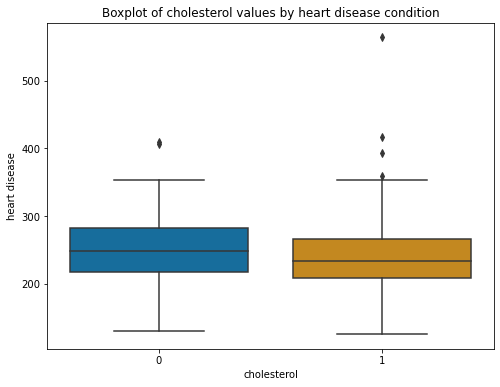

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame(heart_disease)

plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x='target', y='chol', data=data, palette='colorblind')
plt.title("Boxplot of cholesterol values by heart disease condition")
plt.xlabel("cholesterol")
plt.ylabel("heart disease")

    
plt.show()


## Independent samples t-test + p-value  

In [99]:
# Import necessary libraries
import numpy as np
from scipy.stats import ttest_ind

# Sample data for two independent groups
group1 = heart_disease['target']
group2 = heart_disease['chol']

# Perform an independent samples t-test
t_stat, p_value = ttest_ind(group1, group2)

# Display the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation of the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two groups.")


T-Statistic: -82.51887021442299
P-Value: 0.0
Reject the null hypothesis: There is a significant difference between the two groups.


A p-value < 0.05 means a signidicant difference between 2 groups. 
there is a sigificant difference in cholesterol levels between the 2 heart disease groups. 

## Preparing the data

In [3]:
# Create X (all columns except target)
X = heart_disease.drop('target', axis=1)

# Create y (only the target column)
y = heart_disease['target']

Using Scikit-Learn to split it into training and test sets.

In [4]:
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [5]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))


### 2. Preparing a machine learning model

In [6]:
# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier()


### 3. Fitting a model and making predictions

In [7]:
# Fit the RandomForestClassifier to the training data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
# Use the fitted model to make predictions on the test data and # save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

### 4. Evaluating a model's predictions


In [9]:
# Evaluate the fitted model on the training set using the score() function
clf.score(X_train, y_train)

1.0

In [10]:
# Evaluate the fitted model on the test set using the score() function
clf.score(X_test, y_test)

0.8157894736842105

## Experimenting with different classification models


In [11]:
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

# Note: we don't have to import RandomForestClassifier, since we already have

In [12]:
#Instantiating a RandomForestClassifier() in a dictionary
example_dict = {"RandomForestClassifier": RandomForestClassifier()}

# Create a dictionary called models which contains all of the classification models we've imported
# Make sure the dictionary is in the same format as example_dict
# The models dictionary should contain 5 models
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

# Create an empty dictionary called results
results = {}

We can loop through our models dictionary and, call `fit()` on the training data and then call `score()` with the test data.

In [13]:
#Looping through example_dict fitting and scoring the model
example_results = {}
for model_name, model in example_dict.items():
    model.fit(X_train, y_train)
    example_results[model_name] = model.score(X_test, y_test)

# EXAMPLE: View the results
example_results    

{'RandomForestClassifier': 0.8157894736842105}

In [14]:
# Loop through the models dictionary items, fitting the model on the training data
# and appending the model name and model score on the test data to the results dictionary
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test,y_test)

# View the results
results

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.868421052631579,
 'KNN': 0.6842105263157895,
 'SVC': 0.7105263157894737,
 'LogisticRegression': 0.881578947368421,
 'RandomForestClassifier': 0.8157894736842105}

In [15]:
# Run the same code as the cell above, except this time set a NumPy random seed
# equal to 42
np.random.seed(42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8289473684210527,
 'KNN': 0.6842105263157895,
 'SVC': 0.7105263157894737,
 'LogisticRegression': 0.881578947368421,
 'RandomForestClassifier': 0.8289473684210527}

                        accuracy
LinearSVC               0.828947
KNN                     0.684211
SVC                     0.710526
LogisticRegression      0.881579
RandomForestClassifier  0.828947


<AxesSubplot:>

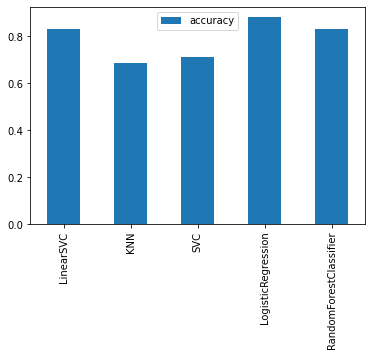

In [16]:
# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
# Be sure to save the dataframe to a variable.
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=['accuracy'])

print(results_df)

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar()



### Hyperparameter Tuning



In [17]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

Import `RandomizedSearchCV`, pass it our dictionary of hyperparameters and let it search for the best combination.

In [18]:
# Setup np random seed of 42
np.random.seed(42)

# Import RandomizedSearchCV from sklearn's model_selection module
from sklearn.model_selection import RandomizedSearchCV

# Setup an instance of RandomizedSearchCV with a LogisticRegression() estimator,
# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=True)

# Fit the instance of RandomizedSearchCV
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [19]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [20]:
# Score the instance of RandomizedSearchCV using the test data
rs_log_reg.score(X_test, y_test)

0.8947368421052632


### Classifier Model Evaluation


In [21]:
# Instantiate a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf = LogisticRegression(**rs_log_reg.best_params_)

#** is parsing cz it doesn't take a dictionary 
#or clf = LogisticRegression(solver="liblinear", C=0.23357214690901212)

# Fit the new instance of LogisticRegression with the best hyperparameters on the training data 
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [22]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report

# Import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import precision_score, recall_score, f1_score

# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import plot_roc_curve 

#or RocCurveDisplay 

Making some predictions on the test data using our latest model and save them to `y_preds`.

In [23]:
# Make predictions on test data and save them
y_preds = clf.predict(X_test)

In [24]:
# Create a confusion matrix using the confusion_matrix function
confusion_matrix(y_test, y_preds)

array([[27,  8],
       [ 0, 41]], dtype=int64)

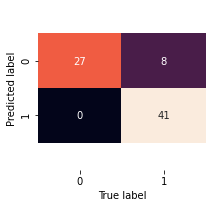

In [25]:
# Create a more visual confusion matrix
import seaborn as sns

# Make confusion matrix more visual
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(y_test, y_preds)

In [26]:
# Create a classification report using the classification_report function
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        35
           1       0.84      1.00      0.91        41

    accuracy                           0.89        76
   macro avg       0.92      0.89      0.89        76
weighted avg       0.91      0.89      0.89        76



In [27]:
# Find the precision score of the model using precision_score()
precision_score(y_test, y_preds)

0.8367346938775511

In [28]:
# Find the recall score
recall_score(y_test, y_preds)

1.0

In [29]:
# Find the F1 score
f1_score(y_test, y_preds)

0.9111111111111111

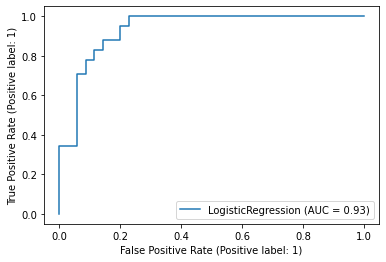

In [30]:
# Plot a ROC curve using our current machine learning model using plot_roc_curve
plot_roc_curve(clf, X_test, y_test)

Cross validation score

In [31]:
# Import cross_val_score from sklearn's model_selection module
from sklearn.model_selection import cross_val_score

In [32]:
# EXAMPLE: By default cross_val_score returns 5 values (cv=5).
cross_val_score(clf, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [33]:
# EXAMPLE: Taking the mean of the returned values from cross_val_score 
# gives a cross-validated version of the scoring metric.
cross_val_acc = np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

0.8479781420765027

In [34]:
# Find the cross-validated precision
cross_val_precision = np.mean(cross_val_score(clf,
                                              X,
                                              y,
                                              scoring="precision",
                                              cv=5))

cross_val_precision

0.8215873015873015

In [35]:
# Find the cross-validated recall
cross_val_precision = np.mean(cross_val_score(clf,
                                              X,
                                              y,
                                              scoring="recall",
                                              cv=5))

cross_val_precision

0.9272727272727274

In [36]:
# Find the cross-validated F1 score
cross_val_precision = np.mean(cross_val_score(clf,
                                              X,
                                              y,
                                              scoring="f1",
                                              cv=5))

cross_val_precision

0.8705403543192143

### Exporting and importing the trained model


In [37]:
# Import the dump and load functions from the joblib library
from joblib import dump, load

### Use the dump function to export the trained model to file

In [38]:
dump(clf, "trained-classifier.joblib")

['trained-classifier.joblib']

In [39]:
# Use the load function to import the trained model you just exported
# Save it to a different variable name to the origial trained model
loaded_clf = load("trained-classifier.joblib")

# Evaluate the loaded trained model on the test data
loaded_clf.score(X_test, y_test)

0.8947368421052632